### 8.2 TensorFlow and Keras

In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import pandas as pd, numpy as np

%matplotlib inline

from tensorflow.keras.preprocessing.image import load_img

In [15]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'


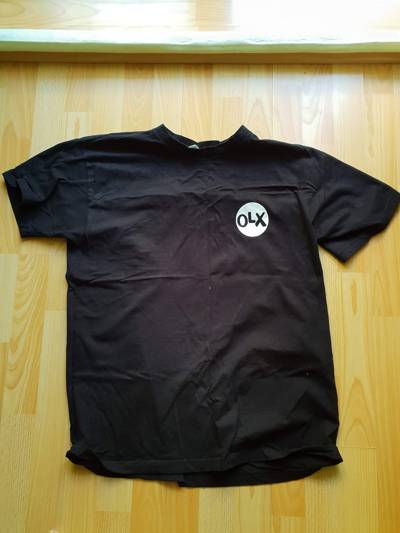

In [16]:
load_img(fullname)

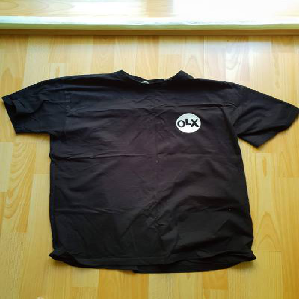

In [17]:
load_img(fullname, target_size=(299,299))

In [18]:
img = load_img(fullname, target_size=(299,299))

In [19]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convulationa neural networks

In [20]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

In [21]:
model = Xception(weights='imagenet', input_shape=(299,299,3))

2023-11-13 03:10:21.399307: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-13 03:10:21.405580: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-13 03:10:21.406171: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-13 03:10:21.407028: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [22]:
X = np.array([x])
X = preprocess_input(X)

In [23]:
pred = model.predict(X)

2023-11-13 03:10:24.795248: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-13 03:10:25.408037: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-13 03:10:25.408949: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-13 03:10:25.408987: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-13 03:10:25.410042: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-13 03:10:25.410124: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 2s 2s/step


In [24]:
pred

array([[3.23797634e-04, 1.57364208e-04, 2.14055952e-04, 1.52957291e-04,
        2.46565614e-04, 3.04462243e-04, 3.23487271e-04, 1.47259430e-04,
        2.04865966e-04, 1.48656196e-04, 1.95693923e-04, 2.11568957e-04,
        7.61277915e-05, 1.14591508e-04, 1.64077312e-04, 2.07021279e-04,
        1.96367881e-04, 1.44514634e-04, 1.40078540e-04, 1.73651570e-04,
        7.50312116e-04, 2.55688588e-04, 2.66562623e-04, 2.96249607e-04,
        3.71848786e-04, 2.81153130e-04, 2.16759348e-04, 2.26841454e-04,
        3.82645841e-04, 1.72122993e-04, 3.08603921e-04, 1.97759553e-04,
        3.93641531e-04, 4.78195376e-04, 2.90634343e-04, 3.26480367e-04,
        1.47040075e-04, 1.63521981e-04, 2.14072497e-04, 1.34214657e-04,
        2.41729620e-04, 6.72481779e-04, 2.53319478e-04, 1.42904013e-04,
        4.11025569e-04, 2.05692108e-04, 3.04202345e-04, 1.49993532e-04,
        2.00595066e-04, 2.28324570e-04, 2.97196471e-04, 2.30766847e-04,
        6.29545364e-04, 7.80994305e-04, 2.47867749e-04, 4.030102

In [25]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960026),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884127),
  ('n04525038', 'velvet', 0.0018057587)]]

### 8.4 Convulutional Neural Networks

### 8.5 Transfer Learning

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train', 
                              target_size=(150, 150), 
                              batch_size=32)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory('./clothing-dataset-small/validation/', 
                              target_size=(150, 150), 
                              batch_size=32,
                                     shuffle=False)

Found 3068 images belonging to 10 classes.


In [28]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [29]:
X,y = next(train_ds)

In [30]:
X.shape


(32, 150, 150, 3)

In [31]:
y[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [32]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory('./clothing-dataset-small/validation/', 
                              target_size=(150, 150), 
                              batch_size=32,
                                     shuffle=False)

Found 341 images belonging to 10 classes.


In [33]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(150,150,3))

In [34]:
#freeze convulutional layers
base_model.trainable = False

In [35]:
inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs)

pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)

outputs = keras.layers.Dense(10)(vectors)
model = keras.Model(inputs, outputs)

In [36]:
preds = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [37]:
preds.shape

(32, 10)

In [38]:
preds[0]

array([ 0.7292119 , -0.12334009, -1.2198056 , -0.11098176, -0.50279677,
       -0.6243885 , -0.6808162 , -0.07327679,  0.23829597,  0.32112223],
      dtype=float32)

In [39]:
learning_rate = 0.01

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [40]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [41]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 17s 160ms/step - loss: 1.2806 - accuracy: 0.6685 - val_loss: 0.8798 - val_accuracy: 0.7507
Epoch 2/10
96/96 [==============================] - 11s 118ms/step - loss: 0.5451 - accuracy: 0.8338 - val_loss: 0.8915 - val_accuracy: 0.7977
Epoch 3/10
96/96 [==============================] - 11s 117ms/step - loss: 0.3622 - accuracy: 0.8745 - val_loss: 0.8469 - val_accuracy: 0.8035
Epoch 4/10
96/96 [==============================] - 11s 116ms/step - loss: 0.2943 - accuracy: 0.9032 - val_loss: 0.8853 - val_accuracy: 0.8006
Epoch 5/10
96/96 [==============================] - 11s 115ms/step - loss: 0.1724 - accuracy: 0.9345 - val_loss: 0.8854 - val_accuracy: 0.7830
Epoch 6/10
96/96 [==============================] - 11s 115ms/step - loss: 0.1049 - accuracy: 0.9658 - val_loss: 1.0003 - val_accuracy: 0.7771
Epoch 7/10
96/96 [==============================] - 11s 114ms/step - loss: 0.0914 - accuracy: 0.9661 - val_loss: 0.9851 - val_accuracy: 0.8035

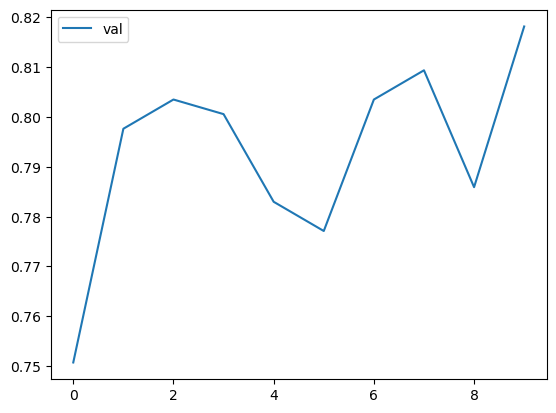

In [42]:
#plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()

### 8.6 Adjust the Learning Rate

In [43]:
def make_model(learning_rate=0.01):
    
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(150,150,3))
    base_model.trainable = False
    
    inputs = keras.Input(shape=(150,150,3))

    base = base_model(inputs)

    pooling = keras.layers.GlobalAveragePooling2D()
    vectors = pooling(base)

    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [44]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print("\n")

0.0001
Epoch 1/10
96/96 [==============================] - 14s 124ms/step - loss: 1.8951 - accuracy: 0.3716 - val_loss: 1.6000 - val_accuracy: 0.4868
Epoch 2/10
96/96 [==============================] - 11s 116ms/step - loss: 1.3758 - accuracy: 0.5613 - val_loss: 1.2491 - val_accuracy: 0.6041
Epoch 3/10
96/96 [==============================] - 11s 116ms/step - loss: 1.1364 - accuracy: 0.6411 - val_loss: 1.0699 - val_accuracy: 0.6716
Epoch 4/10
96/96 [==============================] - 11s 116ms/step - loss: 0.9976 - accuracy: 0.6900 - val_loss: 0.9608 - val_accuracy: 0.7067
Epoch 5/10
96/96 [==============================] - 11s 115ms/step - loss: 0.9056 - accuracy: 0.7076 - val_loss: 0.8874 - val_accuracy: 0.7478
Epoch 6/10
96/96 [==============================] - 11s 115ms/step - loss: 0.8383 - accuracy: 0.7272 - val_loss: 0.8337 - val_accuracy: 0.7595
Epoch 7/10
96/96 [==============================] - 11s 115ms/step - loss: 0.7855 - accuracy: 0.7432 - val_loss: 0.7938 - val_accuracy:

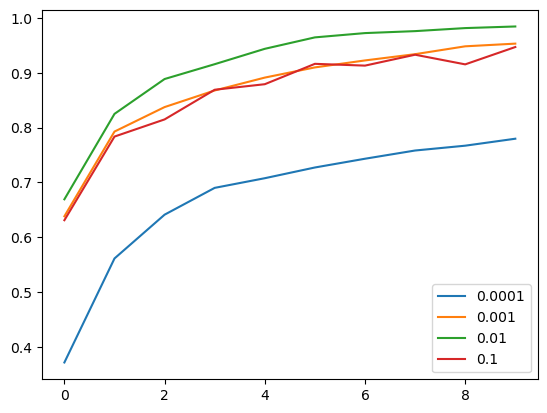

In [45]:
for lr, hist in scores.items():
    #plt.plot(history.history['accuracy'])
    plt.plot(hist['accuracy'], label=lr)
    plt.legend()

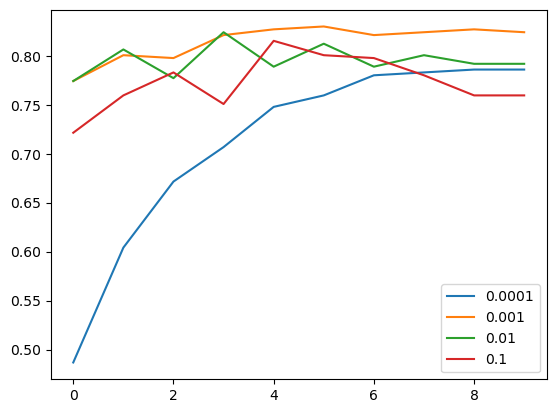

In [46]:
for lr, hist in scores.items():
    #plt.plot(history.history['accuracy'])
    plt.plot(hist['val_accuracy'], label=lr)
    plt.legend()

In [47]:
del scores[0.1]
del scores[0.0001]

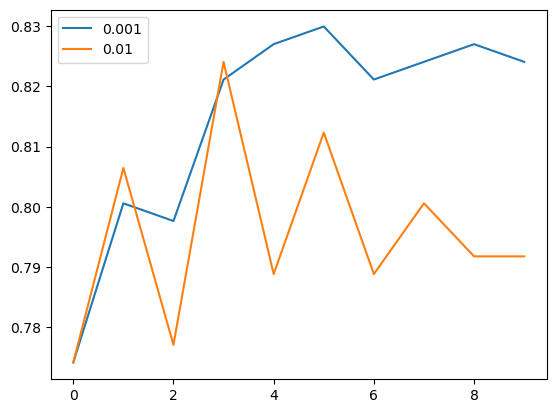

In [48]:
for lr, hist in scores.items():
    #plt.plot(history.history['accuracy'])
    plt.plot(hist['val_accuracy'], label=lr)
    plt.legend()

In [49]:
learning_rate = 0.001

### 8.7 Checkpointing

In [51]:
model.save_weights('model_v1.h5', save_format='h5')

checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [54]:

learning_rate = 0.001

model = make_model(learning_rate=learning_rate)
history= model.fit(train_ds, epochs=10, validation_data =val_ds, callbacks=[checkpoint])

Epoch 1/10
96/96 [==============================] - 14s 127ms/step - loss: 1.0924 - accuracy: 0.6424 - val_loss: 0.7157 - val_accuracy: 0.7713
Epoch 2/10
96/96 [==============================] - 11s 119ms/step - loss: 0.6337 - accuracy: 0.7911 - val_loss: 0.6246 - val_accuracy: 0.8094
Epoch 3/10
96/96 [==============================] - 11s 117ms/step - loss: 0.5076 - accuracy: 0.8364 - val_loss: 0.5938 - val_accuracy: 0.7947
Epoch 4/10
96/96 [==============================] - 12s 122ms/step - loss: 0.4292 - accuracy: 0.8641 - val_loss: 0.5648 - val_accuracy: 0.8211
Epoch 5/10
96/96 [==============================] - 11s 118ms/step - loss: 0.3665 - accuracy: 0.8905 - val_loss: 0.5437 - val_accuracy: 0.8123
Epoch 6/10
96/96 [==============================] - 11s 118ms/step - loss: 0.3307 - accuracy: 0.9025 - val_loss: 0.5331 - val_accuracy: 0.8152
Epoch 7/10
96/96 [==============================] - 12s 121ms/step - loss: 0.2909 - accuracy: 0.9228 - val_loss: 0.5462 - val_accuracy: 0.8240

### 8.8 Add More Layers

In [55]:
def make_model(learning_rate=0.01, size_inner=100):
    
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(150,150,3))
    base_model.trainable = False
    
    inputs = keras.Input(shape=(150,150,3))

    base = base_model(inputs)

    pooling = keras.layers.GlobalAveragePooling2D()
    vectors = pooling(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [56]:
learning_rateing_rate= 0.001
scores = {}


for size in [10, 100, 1000]:
    print(size)
    
    model = make_model(learning_rate=lr, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print("\n")

10
Epoch 1/10
96/96 [==============================] - 14s 126ms/step - loss: 1.3500 - accuracy: 0.5596 - val_loss: 0.9760 - val_accuracy: 0.6862
Epoch 2/10
96/96 [==============================] - 11s 117ms/step - loss: 0.8554 - accuracy: 0.6871 - val_loss: 0.8729 - val_accuracy: 0.6774
Epoch 3/10
96/96 [==============================] - 11s 117ms/step - loss: 0.6607 - accuracy: 0.7581 - val_loss: 0.7672 - val_accuracy: 0.7683
Epoch 4/10
96/96 [==============================] - 11s 116ms/step - loss: 0.5495 - accuracy: 0.8002 - val_loss: 0.7018 - val_accuracy: 0.7507
Epoch 5/10
96/96 [==============================] - 11s 117ms/step - loss: 0.4281 - accuracy: 0.8409 - val_loss: 0.7166 - val_accuracy: 0.7713
Epoch 6/10
96/96 [==============================] - 11s 116ms/step - loss: 0.3847 - accuracy: 0.8546 - val_loss: 0.8061 - val_accuracy: 0.7537
Epoch 7/10
96/96 [==============================] - 11s 117ms/step - loss: 0.3266 - accuracy: 0.8797 - val_loss: 0.7459 - val_accuracy: 0.7

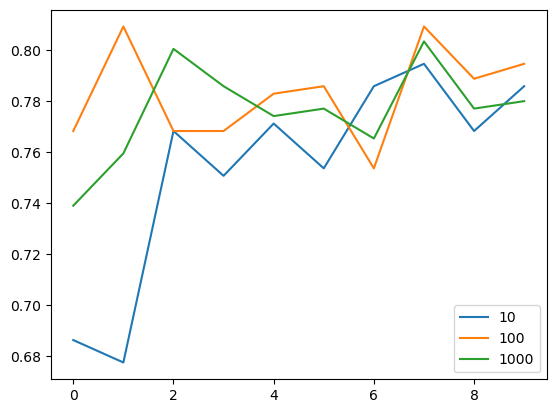

In [57]:
for size, hist in scores.items():
    #plt.plot(history.history['accuracy'])
    plt.plot(hist['val_accuracy'], label=size)
    plt.legend()

### 8.9 Dropout and Regularization

In [58]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(150,150,3))
    base_model.trainable = False
    
    inputs = keras.Input(shape=(150,150,3))

    base = base_model(inputs)

    pooling = keras.layers.GlobalAveragePooling2D()
    vectors = pooling(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [60]:
learning_rate= 0.001
size=100

scores = {}


for droprate in [0, 0.2, 0.5, 0.8]:
    print(droprate)
    
    model = make_model(learning_rate=learning_rate, size_inner=size, droprate=droprate)
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history
    
    print("\n")

0
Epoch 1/30
96/96 [==============================] - 14s 122ms/step - loss: 0.9872 - accuracy: 0.6679 - val_loss: 0.6682 - val_accuracy: 0.7742
Epoch 2/30
96/96 [==============================] - 11s 113ms/step - loss: 0.5178 - accuracy: 0.8142 - val_loss: 0.5971 - val_accuracy: 0.7830
Epoch 3/30
96/96 [==============================] - 11s 113ms/step - loss: 0.3647 - accuracy: 0.8745 - val_loss: 0.5498 - val_accuracy: 0.8328
Epoch 4/30
96/96 [==============================] - 11s 114ms/step - loss: 0.2568 - accuracy: 0.9237 - val_loss: 0.5262 - val_accuracy: 0.8416
Epoch 5/30
96/96 [==============================] - 11s 114ms/step - loss: 0.1779 - accuracy: 0.9521 - val_loss: 0.5290 - val_accuracy: 0.8211
Epoch 6/30
96/96 [==============================] - 11s 113ms/step - loss: 0.1256 - accuracy: 0.9736 - val_loss: 0.5831 - val_accuracy: 0.8416
Epoch 7/30
96/96 [==============================] - 11s 113ms/step - loss: 0.0843 - accuracy: 0.9850 - val_loss: 0.5870 - val_accuracy: 0.82

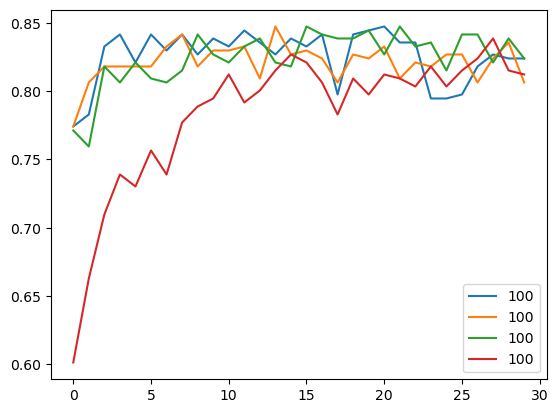

In [61]:
for droprate, hist in scores.items():
    #plt.plot(history.history['accuracy'])
    plt.plot(hist['val_accuracy'], label=size)
    plt.legend()

### 8.10 Data Augmentation

In [62]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                              rotation_range=nge=10,
                              zoom_range=0.1,
                              vertical_flip=True)

train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train', 
                              target_size=(150, 150), 
                              batch_size=32)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory('./clothing-dataset-small/validation/', 
                              target_size=(150, 150), 
                              batch_size=32,
                                     shuffle=False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [ ]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(learning_rate=learning_rate, size_inner=size, droprate=droprate)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

### 8.11 Train Larger Model

In [65]:
def make_model(input_size = 150, learning_rate=0.01, size_inner=100, droprate=0.5):
    
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(input_size,input_size,3))
    base_model.trainable = False
    
    inputs = keras.Input(shape=(input_size,input_size,3))

    base = base_model(inputs)

    pooling = keras.layers.GlobalAveragePooling2D()
    vectors = pooling(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [66]:
input_size = 299

In [67]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                               shear_range=10,
                               zoom_range=0.1,
                               vertical_flip=True
                              )

train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train', 
                              target_size=(input_size, input_size), 
                              batch_size=32)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory('./clothing-dataset-small/validation/', 
                              target_size=(input_size, input_size), 
                              batch_size=32,
                                     shuffle=False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [68]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [70]:
learning_rate = 0.001
size = 100
droprate = 0.2
input_size=299

model = make_model(input_size = input_size, learning_rate=learning_rate, size_inner=size, droprate=droprate)

history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 65s 655ms/step - loss: 1.0705 - accuracy: 0.6408 - val_loss: 0.5243 - val_accuracy: 0.8416
Epoch 2/50
96/96 [==============================] - 60s 628ms/step - loss: 0.6423 - accuracy: 0.7836 - val_loss: 0.4415 - val_accuracy: 0.8475
Epoch 3/50
96/96 [==============================] - 61s 629ms/step - loss: 0.5594 - accuracy: 0.8070 - val_loss: 0.4382 - val_accuracy: 0.8592
Epoch 4/50
96/96 [==============================] - 61s 631ms/step - loss: 0.5071 - accuracy: 0.8308 - val_loss: 0.4280 - val_accuracy: 0.8416
Epoch 5/50
96/96 [==============================] - 61s 630ms/step - loss: 0.4369 - accuracy: 0.8510 - val_loss: 0.4065 - val_accuracy: 0.8534
Epoch 6/50
96/96 [==============================] - 60s 624ms/step - loss: 0.4353 - accuracy: 0.8527 - val_loss: 0.4346 - val_accuracy: 0.8446
Epoch 7/50
96/96 [==============================] - 61s 630ms/step - loss: 0.4128 - accuracy: 0.8572 - val_loss: 0.4267 - val_accuracy: 0.8416

KeyboardInterrupt: 

### 8.12 Using the Model

In [71]:
model = keras.models.load_model('xception_v4_08_0.865.h5')

In [72]:

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_ds = test_gen.flow_from_directory('./clothing-dataset-small/test/', 
                              target_size=(input_size, input_size), 
                              batch_size=32,
                                     shuffle=False)

Found 372 images belonging to 10 classes.


In [73]:
model.evaluate(test_ds)

12/12 [==============================] - 4s 280ms/step - loss: 0.3516 - accuracy: 0.8441


[0.35158759355545044, 0.8440860509872437]

In [74]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [76]:
img = load_img(path, target_size=(299,299))

In [79]:
x = np.array(img)
X = np.array([x])


In [80]:
X = preprocess_input(X)
pred = model.predict(X)

1/1 [==============================] - 1s 620ms/step


In [82]:
dict_classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [85]:
print(list(zip(dict_classes,pred[0])))

[('dress', -3.0911548), ('hat', -4.43249), ('longsleeve', -0.69965196), ('outwear', -0.4361445), ('pants', 8.898621), ('shirt', -2.6627307), ('shoes', -3.8585508), ('shorts', 4.1796794), ('skirt', -2.9312458), ('t-shirt', -3.5931482)]
